## <center> Pré-processamento

### Importando Bibliotecas

In [1]:
from sklearn.pipeline import Pipeline
from sklearn import datasets
from sklearn.model_selection import train_test_split   
from category_encoders import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sqlalchemy import create_engine

In [2]:
import os
os.getcwd()

'c:\\Users\\JPCONCEICAO\\OneDrive - Suzano S A\\Coding\\PROJETO_RECOMENDADOR_CLONAL\\notebooks'

In [3]:
# Importando funções locais
import sys
import os

# Adiciona o caminho da pasta 'scripts' ao sys.path
sys.path.append(os.path.abspath('../pipelines'))

import pre_processor #Funções locais

### Importando dados

Listando as tabelas dentro do .db

In [4]:
from sqlalchemy import create_engine, inspect

# Localizando o banco de dados
caminho_arquivo_db = '..\\data\\processed\\pos_eda.db'

# Criando a engine
engine = create_engine(f'sqlite:///{caminho_arquivo_db}')

# Criando um inspetor
inspetor = inspect(engine)

# Listando os nomes das tabelas
tabelas = inspetor.get_table_names()

# Exibindo os nomes das tabelas
for tabela in tabelas:
    print(tabela)

df_prod


In [5]:
# Carregando as tabelas em DataFrames
df = pd.read_sql_table('df_prod', con=engine)

In [6]:
df.drop(columns=['index'], inplace=True)

In [7]:
df.head()

,Volume,Região,Material Genético,Densidade,Altitude,Espaçamento,Id Floresta,Manejo Atual,Município,Zona Climática,(%) Mortas,(%) Falhas,avg_vol/ha
0,3688.15,MA,SUZMA2019,495.66,212.0,INDEFINIDO,5.79,REFORMA,ESTREITO,M5,0.00,0.00,116.418876
1,5088.81,MA,SUZMA2019,496.07,208.0,300X330,5.70,CONDUÇÃO,ESTREITO,M5,0.00,0.00,99.761027
2,4404.00,MA,SUZMA2019,490.86,187.0,300X330,5.70,CONDUÇÃO,ESTREITO,M5,0.00,0.00,91.788245
3,4228.73,MA,SUZMA2019,513.60,218.0,300X330,5.02,CONDUÇÃO,ESTREITO,M5,0.04,0.00,121.690072
4,6490.57,MA,SUZMA2025,559.88,232.0,300X330,5.03,CONDUÇÃO,ESTREITO,M5,0.07,0.02,129.941341


Avaliando Cardinalidade das colunas com dados object

In [8]:
# Iterando sobre cada coluna do tipo 'object'
for col in df.select_dtypes(include='object').columns:
    print(f"Coluna: {col}")
    print(f'Quantidade de valores únicos nessa coluna: {df[col].nunique()}')
    print(df[col].value_counts())
    print("\n" + "-"*50 + "\n")


Coluna: Região
Quantidade de valores únicos nessa coluna: 3
Região
MA    818
PA    362
TO    261
Name: count, dtype: int64

--------------------------------------------------

Coluna: Material Genético
Quantidade de valores únicos nessa coluna: 60
Material Genético
SUZMA2019    332
SUZA0562     144
AEC0144      136
SUZA0385     117
SUZA1250     111
CO1355        71
BA6021        57
AEC1528       53
SUZBA1922     43
VCC975        37
SUZA1253      35
SUZA0217      33
CO1407        32
SUZA0407      32
SUZA1265      23
AEC0224       18
PESQUISA      17
SUZA1099      16
VES0021       12
SUZBA1083     11
VE41          10
SUZA1135       9
AMC08          8
CO1423         7
SUZA1981       6
SUZA1958       6
SUZMA2025      5
SUZSP1002      5
VCC865         4
IPB2           3
VES0032        3
SUZA1712       3
CO0321         3
GG100          3
EUR            2
SUZMA2037      2
CO1404         2
BA7340         2
GER0680        2
SUZMA2049      2
SUZMA2022      2
IPB1           2
SUZA0540       2
AEC

Feature Engineering p.II

In [9]:
# Transformando coluna de espaçamento para Nº de Arv/Ha
# Considerações, caso haja erro, considerar a moda (espaçamento mais comum)
pre_processor.calcular_arvores_por_ha(df, 'Espaçamento')

In [10]:
df.head(2)

,Volume,Região,Material Genético,Densidade,Altitude,arv/ha,Id Floresta,Manejo Atual,Município,Zona Climática,(%) Mortas,(%) Falhas,avg_vol/ha
0,3688.15,MA,SUZMA2019,495.66,212.0,1111,5.79,REFORMA,ESTREITO,M5,0.0,0.0,116.418876
1,5088.81,MA,SUZMA2019,496.07,208.0,1111,5.70,CONDUÇÃO,ESTREITO,M5,0.0,0.0,99.761027


Redução de cardinalidade

In [11]:
# Aplicando a função para transformar em "outro" todos o valores que ocorrem < 10 vezes.
train = pre_processor.substituir_valores_raros(df, limite=10, excluir_colunas=['Material Genético'])

In [12]:
# Iterando sobre cada coluna do tipo 'object'
for col in df.select_dtypes(include='object').columns:
    print(f"Coluna: {col}")
    print(f'Quantidade de valores únicos nessa coluna: {df[col].nunique()}')
    print(df[col].value_counts())
    print("\n" + "-"*50 + "\n")

Coluna: Região
Quantidade de valores únicos nessa coluna: 3
Região
MA    818
PA    362
TO    261
Name: count, dtype: int64

--------------------------------------------------

Coluna: Material Genético
Quantidade de valores únicos nessa coluna: 60
Material Genético
SUZMA2019    332
SUZA0562     144
AEC0144      136
SUZA0385     117
SUZA1250     111
CO1355        71
BA6021        57
AEC1528       53
SUZBA1922     43
VCC975        37
SUZA1253      35
SUZA0217      33
CO1407        32
SUZA0407      32
SUZA1265      23
AEC0224       18
PESQUISA      17
SUZA1099      16
VES0021       12
SUZBA1083     11
VE41          10
SUZA1135       9
AMC08          8
CO1423         7
SUZA1981       6
SUZA1958       6
SUZMA2025      5
SUZSP1002      5
VCC865         4
IPB2           3
VES0032        3
SUZA1712       3
CO0321         3
GG100          3
EUR            2
SUZMA2037      2
CO1404         2
BA7340         2
GER0680        2
SUZMA2049      2
SUZMA2022      2
IPB1           2
SUZA0540       2
AEC

Aplicando Pipeline para Remover outliers, aplicar o StandardScaler e, por fim, o one hot encoder.

In [20]:
from pre_processor import create_preprocessing_pipeline, apply_preprocessing

ImportError: cannot import name 'create_preprocessing_pipeline' from 'pre_processor' (c:\Users\JPCONCEICAO\OneDrive - Suzano S A\Coding\PROJETO_RECOMENDADOR_CLONAL\pipelines\pre_processor.py)

In [ ]:
# Crie e aplique a pipeline de pré-processamento
preprocessor = create_preprocessing_pipeline(df)
df_processed = apply_preprocessing(preprocessor, df)

#### Avaliação e Tratamento de Multicolinearidade: Identificação e possível remoção de variáveis altamente correlacionadas.



Avaliar esse quesito é importante já que:
- Dificulta a interpretação dos coeficientes;
- Reduz a capacidade preditiva: Overfitting;
- Atrapalha na identificação da influência individual de variáveis, pois 'dizem a mesma coisa' para o modelo;
- Dentre outros problemas.

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Função para filtrar e visualizar correlação
def filtrar_e_visualizar_correlacao(df, threshold, drop_column = None):

    # Calcula a matriz de correlação
    corr = df.corr()
    
    # Aplica os filtros de limiar, excluindo a correlação perfeita
    filtro = (abs(corr) >= threshold) & (corr != 1.0)
    df_filtrado = corr.where(filtro).dropna(how = 'all').dropna(axis = 1, how = 'all')
    
    # Remove a coluna e linha especificada, se fornecido
    if drop_column:
        df_filtrado = df_filtrado.drop(index = drop_column, 
                                       errors = 'ignore').drop(columns = drop_column, 
                                                               errors = 'ignore')
    
    # Visualiza o resultado com um heatmap somente com as variáveis que satisfazem o critério de filtro
    plt.figure()
    sns.heatmap(df_filtrado, annot = True, cmap = 'coolwarm', center = 0)
    plt.show()

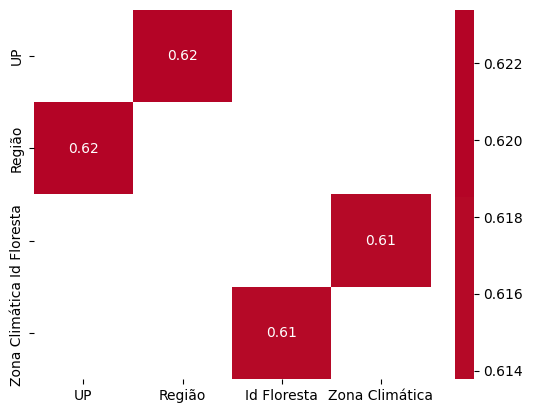

In [ ]:
# Verificar quais variáveis podem apresentar multicolinearidade através da correlação - utilizaremos 0.6 como limiar
filtrar_e_visualizar_correlacao(df_prod, threshold = 0.6, drop_column = None) # 

Fator de Inflação da Variância (VIF)

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [ ]:
# Adicionar uma constante (termo de interceptação) ao DataFrame
df_with_constant = add_constant(df_prod)

# Calcular o VIF para cada variável
vif_data = pd.DataFrame()
vif_data["Variable"] = df_with_constant.columns
vif_data["VIF"] = [variance_inflation_factor(df_with_constant.values, i) for i in range(df_with_constant.shape[1])]

# Exibir os resultados
print(vif_data)

             Variable         VIF
0               const  529.632489
1                  UP    4.071559
2              Volume    1.588160
3              Região    8.820483
4   Material Genético    1.320832
5           Densidade    1.550562
6            Altitude    3.596968
7         Espaçamento    1.429388
8         Id Floresta    4.417252
9        Manejo Atual    1.548060
10          Município    3.686391
11     Zona Climática    4.150159
12         (%) Mortas    1.494765
13         (%) Falhas    1.958921
14         avg_vol/ha    1.429556


Considerações:

VIF ≈ 1: Nenhuma multicolinearidade <br>
1 < VIF ≤ 5: Multicolinearidade moderada. <br>
5 < VIF ≤ 10: Alta multicolinearidade. <br>
VIF > 10: Multicolinearidade muito alta.

#### Balanceamento de Classes



In [ ]:
# Verificar se os dados são desbalanceados
df_prod['Material Genético'].value_counts()

Material Genético
SUZMA2019    67
AEC0144      57
SUZA1250     46
SUZA0385     35
VCC975       33
CO1355       24
SUZBA1922    21
SUZA0562     20
BA6021       19
SUZA0407     16
SUZA1099     11
SUZA1253      9
AEC1528       9
SUZBA1083     9
CO1407        8
AEC0224       8
SUZA1265      8
VES0021       7
CO1423        5
SUZA1958      4
PESQUISA      3
VE41          3
SUZA0217      3
SUZA1712      2
SUZA1981      2
AMC08         2
SUZA1135      2
CO1404        2
AMC03         1
IPB1          1
CNB386        1
BA7340        1
FGCA0007      1
BHN1355       1
QGS1445       1
CO0321        1
SUZMA2003     1
Name: count, dtype: int64

É possível identificar que há muitos exemplos de alguns materiais genéticos e poucos de outros. Isto irá enviesar o modelo e, mesmo que atinga uma boa acurácia, poderá apresentar valores ruins para precisão e recall.